In [1]:
from svinterface.core.polydata import Centerlines
from svinterface.core.zerod.lpn import LPN

c = Centerlines.load_centerlines('../data/diseased/AS1_SU0308_stent/results/AS1_SU0308_nonlinear/3D_DIR/AS1_SU0308_3D_centerlines.formatted.vtp')

In [102]:
c = Centerlines.load_centerlines('../data/diseased/AS1_SU0308_stent/results/AS1_SU0308_nonlinear/LPN_DIR/AS1_SU0308.sim.14/centerline_projection.vtp')

In [103]:
for a in c.get_pointdata_arraynames():
    if a.startswith("dia"):
        print(a)

dia_flow_0.8666666666666671
dia_pressure_0.8666666666666671


In [104]:
sysp = c.get_pointdata_array("sys_pressure_0.2225225225225227")
avgp = c.get_pointdata_array("avg_pressure")
diap = c.get_pointdata_array("dia_pressure_0.8666666666666671")
sysf = c.get_pointdata_array("sys_flow_0.2225225225225227")
avgf = c.get_pointdata_array("avg_flow")
diaf = c.get_pointdata_array("dia_flow_0.8666666666666671")

In [2]:
lpn = LPN.from_file("../data/diseased/AS1_SU0308_stent/results/AS1_SU0308_nonlinear/LPN_DIR/AS1_SU0308.in")

In [106]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt

In [107]:
def print_dp(lpn: LPN, vid):
    v = lpn.get_vessel(vid)
    gids = v['gid']
    print(gids)
    dsp = sysp[gids[0]] - sysp[gids[1]]
    dap = avgp[gids[0]] - avgp[gids[1]]
    ddp = diap[gids[0]] - diap[gids[1]]
    print(dsp, dap, ddp, sep = '\n')
    print()
    plt.plot([diaf[gids[0]],avgf[gids[0]],sysf[gids[0]]], [ddp, dap, dsp])

In [9]:
tree = lpn.get_tree()
tree.children[0].children[1].vessel_info

[{'gid': [12349, 12388],
  'side': 'RPA',
  'vessel_id': 81,
  'vessel_length': 0.9671380073802638,
  'vessel_name': 'branch67_seg0',
  'zero_d_element_type': 'BloodVessel',
  'zero_d_element_values': {'C': 4.3105195306351945e-07,
   'L': 1.3800804387389451,
   'R_poiseuille': 69.04145562150654,
   'stenosis_coefficient': 3.099667057838769e-10}}]

In [5]:
for node in lpn.tree_bfs_iterator(tree):
    print(node)

In [10]:
for idx, vess in enumerate(lpn.lpn_data[lpn.VESS]):
    print(idx + 1, vess)

1 {'boundary_conditions': {'inlet': 'INFLOW'}, 'gid': [0, 1], 'side': 'MPA', 'vessel_id': 0, 'vessel_length': 0.3032801643946173, 'vessel_name': 'branch0_seg0', 'zero_d_element_type': 'BloodVessel', 'zero_d_element_values': {'C': 4.869774388365284e-07, 'L': 0.12012579864284216, 'R_poiseuille': 1.6087900294822344, 'stenosis_coefficient': 0.0}}
2 {'gid': [105, 144], 'side': 'LPA', 'vessel_id': 1, 'vessel_length': 1.0033050211440404, 'vessel_name': 'branch1_seg0', 'zero_d_element_type': 'BloodVessel', 'zero_d_element_values': {'C': 6.197086765881422e-07, 'L': 1.033083702414404, 'R_poiseuille': 70.93030945130596, 'stenosis_coefficient': 7.712571103928528e-05}}
3 {'gid': [517, 533], 'side': 'LPA', 'vessel_id': 2, 'vessel_length': 0.24167216433156175, 'vessel_name': 'branch2_seg0', 'zero_d_element_type': 'BloodVessel', 'zero_d_element_values': {'C': 4.052411366663954e-08, 'L': 0.9166358818763622, 'R_poiseuille': 0, 'stenosis_coefficient': 0.0}}
4 {'boundary_conditions': {'outlet': 'RCR_0'}, 

In [108]:
tree = lpn.get_tree()

vid = []
for node in lpn.tree_bfs_iterator(tree, allow = 'branch'):
    for id in node.ids:
        vid.append(id)

    

In [109]:
interact(print_dp,lpn = fixed(lpn) ,vid = vid )

interactive(children=(Dropdown(description='vid', options=(0, 1, 81, 2, 4, 11, 12, 18, 19, 20, 21, 24, 25, 26,…

<function __main__.print_dp(lpn: svinterface.core.zerod.lpn.LPN, vid)>

In [110]:
def print_dp_junc(lpn: LPN, jid):
    j = lpn.get_junction(jid)
    gids = j['gid']
    print(gids)
    pts = [[diap[gids[0]] - diap[gids[1][i]], avgp[gids[0]] - avgp[gids[1][i]], sysp[gids[0]] - sysp[gids[1][i]]] for i in range(len(gids[1]))]
    xp = [[diaf[gids[0]], avgf[gids[0]], sysf[gids[0]]] for i in range(len(gids[1]))]
    print(pts, sep = '\n')
    print()
    for x, y in list(zip(xp, pts)):
        plt.plot(x, y)

In [111]:
tree = lpn.get_tree()

jid = []
for node in lpn.tree_bfs_iterator(tree, allow = 'junction'):
    for id in node.ids:
        jid.append(id)

    

In [112]:
interact(print_dp_junc,lpn= fixed(lpn),jid= jid)

interactive(children=(Dropdown(description='jid', options=('J0', 'J1', 'J22', 'J2', 'J3', 'J5', 'J6', 'J7', 'J…

<function __main__.print_dp_junc(lpn: svinterface.core.zerod.lpn.LPN, jid)>

In [113]:
import numpy as np

In [116]:
from svinterface.core.polydata import Centerlines
from svinterface.core.zerod.lpn import LPN

In [117]:
c = Centerlines.load_centerlines("../data/diseased/AS1_SU0308_stent/results/AS1_SU0308_nonlinear/3D_DIR/prestent/AS1_SU0308_3D_centerlines.formatted.vtp")

In [208]:
sysp = c.get_pointdata_array(array_name='sys_pressure_0.22500')[0]
sysp2 = c.get_pointdata_array(array_name='sys_pressure_0.22500')[1]
diap = c.get_pointdata_array(array_name='dia_pressure_0.85500')[0]
diap2 = c.get_pointdata_array(array_name='dia_pressure_0.85500')[1]
avgp = c.get_pointdata_array(array_name='avg_pressure')[0]
avgp2 = c.get_pointdata_array(array_name='avg_pressure')[1]

In [191]:
lpn = LPN.from_file("../data/diseased/AS1_SU0308_stent/results/AS1_SU0308_nonlinear/LPN_DIR/AS1_SU0308.sim.2/AS1_SU0308.in")

In [192]:
lpn.get_vessel(0)

{'boundary_conditions': {'inlet': 'INFLOW'},
 'gid': [0, 1],
 'side': 'MPA',
 'vessel_id': 0,
 'vessel_length': 0.3032801643946173,
 'vessel_name': 'branch0_seg0',
 'zero_d_element_type': 'BloodVessel',
 'zero_d_element_values': {'C': 4.869774388365284e-07,
  'L': 0.12012579864284216,
  'R_poiseuille': 0.042571278171065534,
  'stenosis_coefficient': 0.0}}

In [212]:
x = np.array([lpn.inflow.min_inflow, lpn.inflow.mean_inflow, lpn.inflow.max_inflow])

In [213]:
X = np.array([ x, x**2]).T

In [214]:
y = np.array([diap - diap2, avgp-avgp2, sysp-sysp2])

In [215]:
X_inv = np.linalg.pinv(X) 

In [216]:
t = X_inv @ y

In [217]:
t

array([9.59093778e-04, 2.47251074e-06])

In [218]:
import matplotlib.pyplot as plt

In [219]:
x[-1]

266.2176635270139

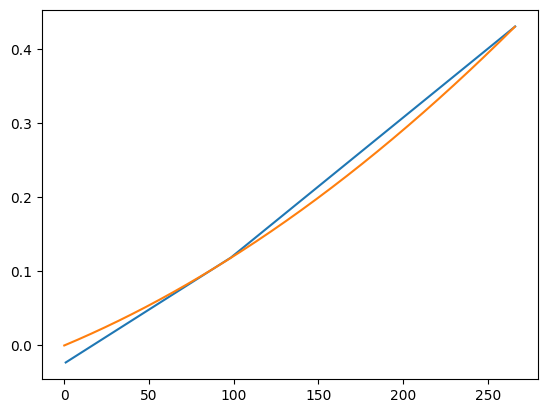

In [220]:
plt.plot(x, y)
f = lambda x:  t[0] * x + t[1] * x**2
x2 = np.arange(0, x[-1], 1)
plt.plot(x2, f(x2))

In [157]:
from svinterface.core.zerod.solver import Solver0Dcpp
from scipy import optimize

In [158]:
s = Solver0Dcpp(lpn, last_cycle_only=True, mean_only=False)

In [209]:
def min_func(x, lpn: LPN):
    
    lpn.change_vessel(0, R=x[0], S = x[1])
    s = Solver0Dcpp(lpn, last_cycle_only=True, mean_only=False)
    rez = s.run_sim()
    rez.convert_to_mmHg()
    avgP = rez.get_avg_val("branch0_seg0", val = 'pressure_in')
    sysP = rez.get_max_val("branch0_seg0", val = 'pressure_in')
    diaP = rez.get_min_val("branch0_seg0", val = 'pressure_in')
    
    avgP2 = rez.get_avg_val("branch0_seg0", val = 'pressure_out')
    sysP2 = rez.get_max_val("branch0_seg0", val = 'pressure_out')
    diaP2 = rez.get_min_val("branch0_seg0", val = 'pressure_out')
    loss = ((avgp - avgP) **2 + (sysp - sysP) ** 2 + (diap - diaP)**2 + (avgp2 - avgP2) **2 + (sysp2 - sysP2) ** 2 + (diap2 - diaP2)**2) ** (1/2)
    print(loss)
    return loss


x = optimize.minimize(min_func, [0.042571278171065534, 0], (lpn), method="Nelder-Mead", bounds=optimize.Bounds([0,0], [ np.inf, np.inf], keep_feasible=True))
    

20.262215795499642
20.26190721783958
20.25268925349525
20.252380831034372
20.24746519541456
20.238248041112488
20.22641128804755
20.221185497828863
20.20544304254343
20.184423930219882
20.152974708700242
20.132086069400447
20.08509706162307
20.03295896312718
19.947308240514527
19.88017886713494
19.745308084065904
19.61012553418739
19.377529035657123
19.182126033672304
18.812990886167693
18.46755395263156
17.87328721982626
17.37747553497019
16.52494905415217
15.835587859851127
14.904804503053523
14.476412620684993
14.811055158321695
14.736317817979298
15.445963164463816
14.492463679630799
15.524018296127704
14.44464066080763
14.455673764849553
14.754286685721125
14.421414527459937
14.42445852105329
14.484185853881906
14.423217632061835
14.427733009504792
14.421047575548675
14.433155854366367
14.420479009725685
14.420608341161218
14.423507088810984
14.42035634974188
14.420490705051142
14.420359945556529
14.42082834021603
14.420344133020974
14.420313713628207
14.420317663341107
14.4204481

In [210]:
print(x)

 final_simplex: (array([[0.        , 0.26093129],
       [0.        , 0.26092942],
       [0.        , 0.26100527]]), array([14.41844275, 14.41844275, 14.41844305]))
           fun: 14.418442747165253
       message: 'Optimization terminated successfully.'
          nfev: 95
           nit: 51
        status: 0
       success: True
             x: array([0.        , 0.26093129])
